<a href="https://colab.research.google.com/github/dzurel/Mobile-Apps-Games/blob/master/Mobile_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I would like to record my practice to become an expert in data visualization.

I will make several series in the future. In this Kernel, I use these packages :

- bokeh
- countplot(compare between seaborn&matplotlib)
- how to draw time series data with bokeh?
- seaborn
- regplot, lmplot
- heatmap
- boxplot
- missingno
- wordcloud
- requests + PIL
- networkx
- correlation graph

Table of Contents

- Import Default Library & Check Data
- Simple Ideas Of Visualization
- Check Missing Data (Missingno)
- Name & Subtitle (Word Cloud)
- Icon URL (Requests & Crawling)
- Average User Rating (Bokeh : Countplot Compare)
- Price & Rating (Seaborn : Regplot, Lmplot)
- Primary Genre & Genres (Networkx, Network Graph)
- Original Release Date & Size (Time Series with bokeh)

### Import default Library & Check Data

In [0]:
# Data Processing
import numpy as np
import pandas as pd

# Basic Visualization tools
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_palette('husl')


# Bokeh (interactive visualization)
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure
output_notebook() # You can use output_file()

# Special Visualization
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value


In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/dzurel/Mobile-Apps-Games/master/appstore_games.csv')

You can check the simple data information by using describe method.

In [3]:
data.describe() #numeric

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [4]:
data.describe(include='O') #categorical

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/rg-tic-tac-toe-p...,Air Troops - Little War Soldier Parachute,Emoji Stickers,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


### Simple Ideas of Visualization

**Goal : Create a story with visualization**

Single Feature
Here's a simple idea about handling a single feature:

### Two or More Features
Let's make more stories in Data

- Price & User Rating Count : Could paid apps lead to user reactions?
- Price & Age Rating : Price by age group
- Genre & Size: Relationship between Genre and Size (add more features and make - simple regression model)
- Title & Subtitle & Genres : Tendency of titles by genre

In [0]:
data = data.drop(['URL', 'ID'], axis=1)

### Check Missing Data (missingno)

missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your dataset.

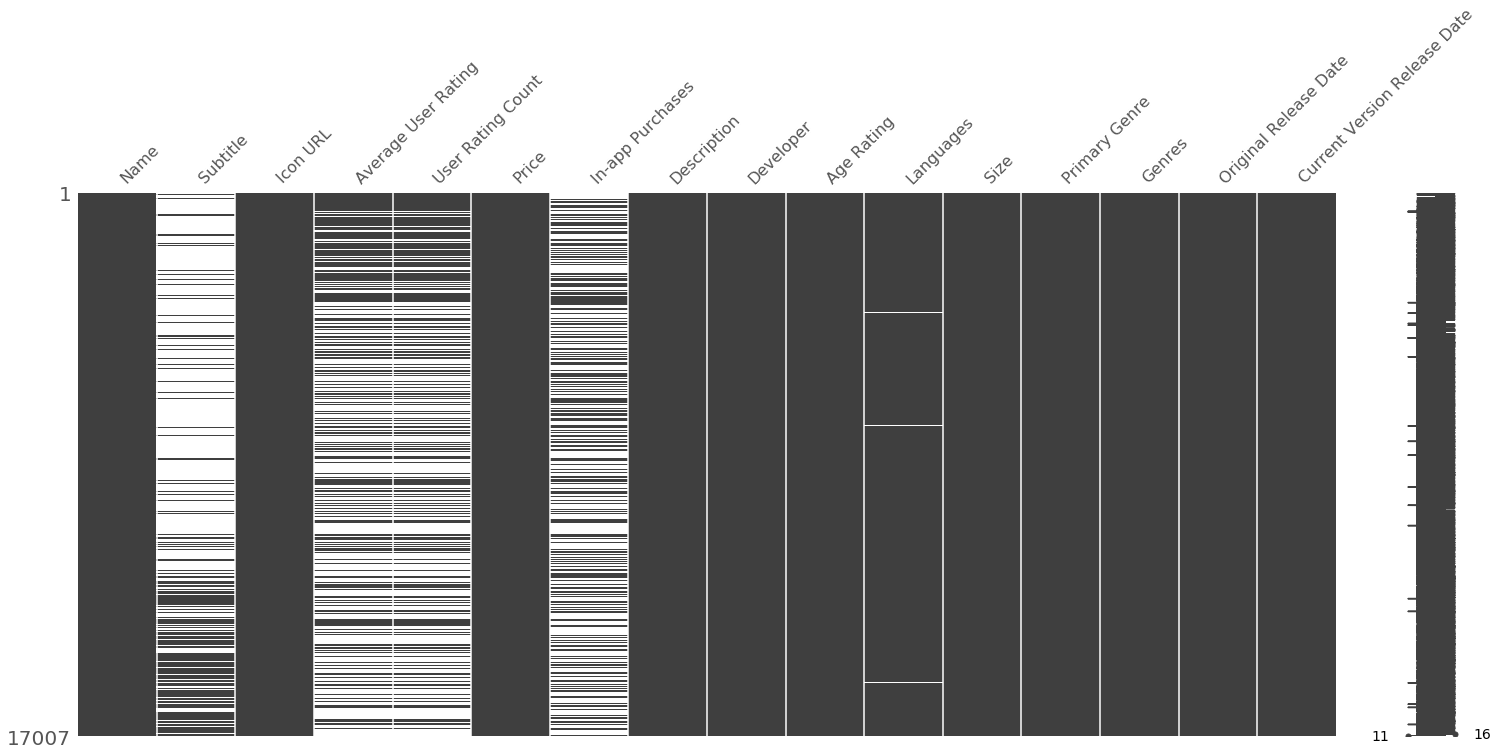

In [6]:
msno.matrix(data)

In [7]:
print(data.columns)

Index(['Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


### Name & Subtitle (Word Cloud)¶

- Which words are most used
A tag cloud (word cloud, or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text.

Using WordCloud package, we can easily make workcloud image.

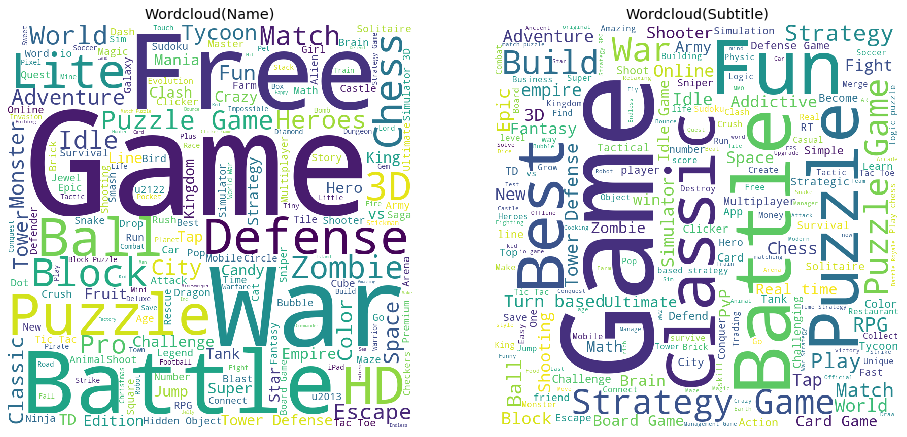

CPU times: user 4.74 s, sys: 169 ms, total: 4.91 s
Wall time: 4.93 s


In [8]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

**Name**
- Game, Free, War, Defense, Puzzle, Block, Chess


**Subtitle**
- Game, Classic, Battle, Puzzle, Best, Fun

### Icon URL (requests & Crawling)

This data is provided as a URL. In this case, you can get it by crawling. Please check your internet connection.

single url crawling: 0.5 sec
total : 17000 * 0.5 = 8500 s = over 2 hour.. OMG
just testing sample code (100 image)

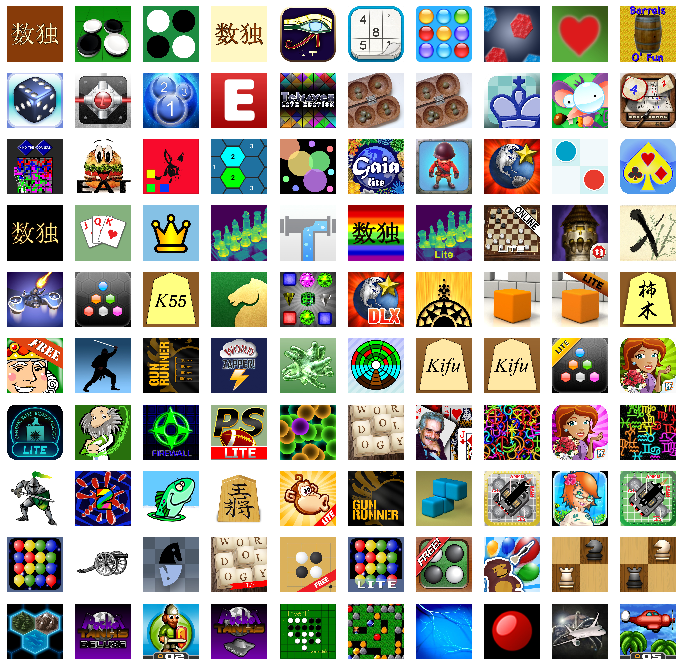

CPU times: user 5.52 s, sys: 144 ms, total: 5.66 s
Wall time: 20.6 s


In [9]:
%%time
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

fig, ax = plt.subplots(10,10, figsize=(12,12))

for i in range(100):
    r = requests.get(data['Icon URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

### Average User Rating (Bokeh : countplot compare)¶

Bokeh don't have countplot. so we have to implement ad-hoc

- Use Pandas method : value_counts()
- Sort this values. Becauses value_counts() values are already sort by counting numbers. use sort_index()
- x_range should be string list. so use map to convert index values

In [10]:
aur = data['Average User Rating'].value_counts().sort_index()
p = figure(x_range=list(map(str, aur.index.values)), 
           plot_height=250, title="Average User Rating", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, aur.index.values)), 
       top=aur.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

You can use this on seaborn and matplotlib like this

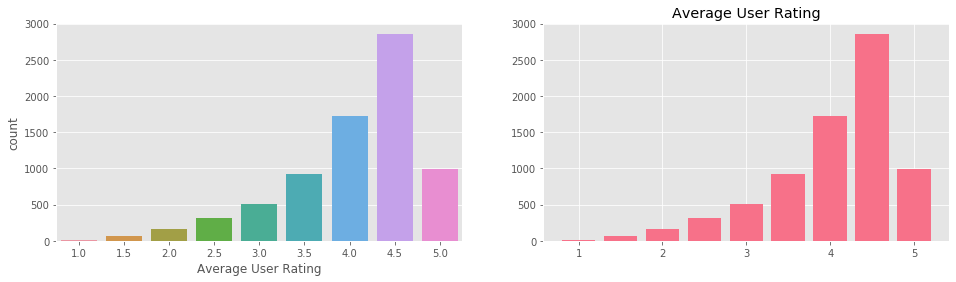

In [11]:
fig, ax = plt.subplots(1,2,figsize=(16, 4))
sns.countplot(data['Average User Rating'],ax=ax[0]) # seaborn
ax[1].bar(aur.index, aur, width=0.4) # matplotlib
ax[1].set_title('Average User Rating')
plt.show()

### Price & Rating (seaborn : regplot, lmplot)

I want to look at the relationship between price and rating. Use regplot as a simple plot for this

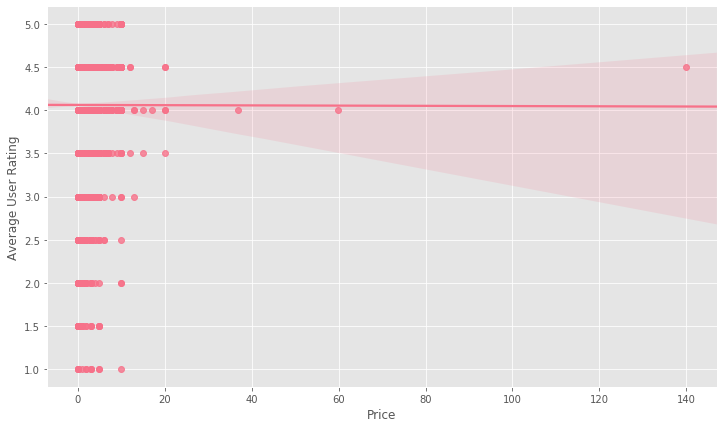

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Average User Rating', ax=ax)
plt.show()

As you can see, there seems to be little relationship between price and rating. Most of the ratings are 4 points.

How about mean and std value?

In [13]:
price_list = sorted(data['Price'].dropna().unique())
rating_stat = pd.DataFrame(columns=['mean', 'std', 'count'], index=price_list)
for price in price_list:
    tmp = data[data['Price']==price]['Average User Rating'].dropna()
    rating_stat['mean'][price] = tmp.mean()
    rating_stat['std'][price] = tmp.std()
    rating_stat['count'][price] = len(tmp)

rating_stat.T.head(len(price_list))

,0.00,0.99,1.99,2.99,3.99,4.99,5.99,6.99,7.99,8.99,9.99,11.99,12.99,14.99,16.99,18.99,19.99,29.99,36.99,37.99,59.99,99.99,139.99,179.99
mean,4.07123,3.90341,4.02239,4,4.1619,4.06216,4,4.17308,4.15,4.16667,4.0625,4.16667,3.66667,3.75,4,NaN,4.1,NaN,4,NaN,4,NaN,4.5,NaN
std,0.745921,0.79746,0.814399,0.827804,0.60246,0.780312,0.666667,0.488719,0.579751,0.389249,0.854432,0.57735,0.57735,0.353553,NaN,NaN,0.41833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,6325,352,201,252,105,185,28,26,10,12,48,3,3,2,1,0,5,0,1,0,1,0,1,0


There seems to be no tendency

### Primary Genre & Genres (Heatmap + networkx, Network Graph)

Not surprisingly, Games are the majority.

In [14]:
genre = data['Primary Genre'].value_counts()
p = figure(x_range=list(map(str, genre.index.values)), 
           plot_height=250, plot_width=1500, title="Primary Genre", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, genre.index.values)), 
       top=genre.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

How about sub-Genres?

In [15]:
data['Genres'].head()

0              Games, Strategy, Puzzle
1               Games, Strategy, Board
2               Games, Board, Strategy
3              Games, Strategy, Puzzle
4    Games, Strategy, Board, Education
Name: Genres, dtype: object

In [16]:
data['GenreList'] = data['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
data['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [17]:
gameTypes = []
for i in data['GenreList']: gameTypes += i
gameTypes = set(gameTypes)
print("There are {} types in the Game Dataset".format(len(set(gameTypes))))

There are 56 types in the Game Dataset


### How do you know the correlation between them?

- heatmap : using seaborn heatmap
- graph : using networkx and plotly

### heatmap (correlation)
- A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors.

- Usually we use corr to calculate the correlation and draw it as a heatmap.

It is also effective for drawing contours from three-dimensional data.

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

test = data['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

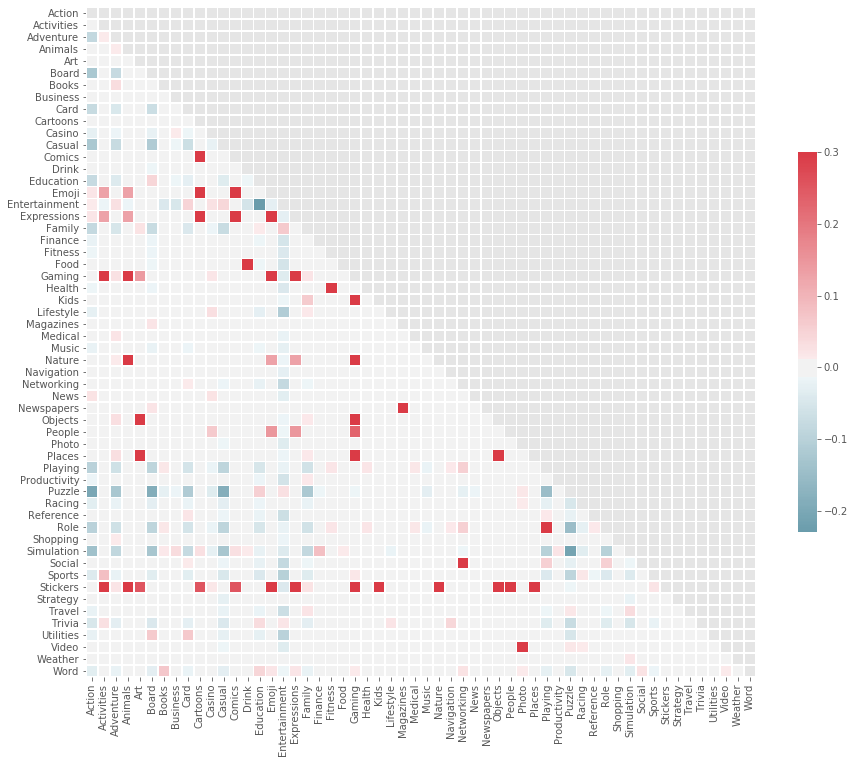

In [19]:
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Graph (corr)
- NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

- Reference

Visualising stocks correlations with Networkx

### Original Release Date & Size (time series)

We will look at trends in app size over time.

First, Convert str to datetime type
re-index by using set_index

In [20]:
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'], format = '%d/%m/%Y')
date_size = pd.DataFrame({'size':data['Size']})
date_size = date_size.set_index(data['Original Release Date'])
date_size = date_size.sort_values(by=['Original Release Date'])
date_size.head()

,size
Original Release Date,
2008-07-11,15853568.0
2008-07-11,12328960.0
2008-07-11,674816.0
2008-07-18,34689024.0
2008-07-23,21552128.0


In [0]:
date_size['size'] = date_size['size'].apply(lambda b : b//(2**10)) # B to KB

In [22]:
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size')
fig.line(y='size', x='Original Release Date', source=date_size)
show(fig)

Let's look at the month for trends.

We can use resample method.

The criteria for grouping depend on the parameters.

'M' means 'end of month', 'Y' means 'Year'.

In [23]:
monthly_size = date_size.resample('M').mean()
tmp = date_size.resample('M')
monthly_size['min'] = tmp.min()
monthly_size['max'] = tmp.max()
monthly_size.head()

,size,min,max
Original Release Date,,,
2008-07-31,19545.142857,659.0,47532.0
2008-08-31,32178.300000,714.0,119948.0
2008-09-30,11157.166667,433.0,51012.0
2008-10-31,24377.285714,1268.0,73283.0
2008-11-30,12429.666667,1710.0,43291.0


In [24]:
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size (Monthly)')
fig.line(y='size', x='Original Release Date', source=monthly_size, line_width=2, line_color='Green')
show(fig)

In [25]:
yearly_size = date_size.resample('Y').mean()
monthly_size.head()
fig = figure(x_axis_type='datetime',           
             plot_height=250, plot_width=750,
             title='Date vs App Size (Monthly & Yearly)')
fig.line(y='size', x='Original Release Date', source=monthly_size, line_width=2, line_color='Green', alpha=0.5)
fig.line(y='size', x='Original Release Date', source=yearly_size, line_width=2, line_color='Orange', alpha=0.5)
show(fig)

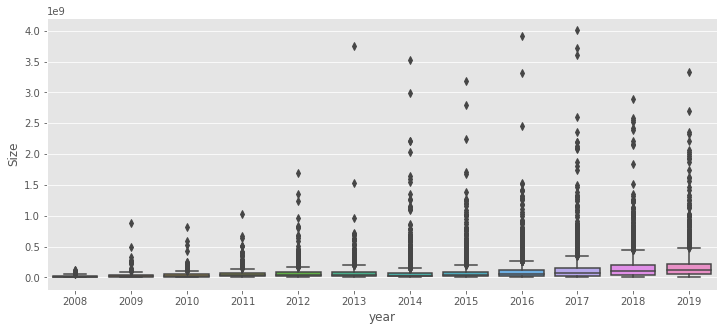

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
data['year'] = data['Original Release Date'].apply(lambda x : x.year)
sns.boxplot(x='year', y='Size', data=data, ax=ax)
plt.show()

### Countplot
Seaborn : countplot, barplot + value_counts()
In seaborn, we can easily draw these graph

Countplot : Show the counts of observations in each categorical bin using bars.
Let's plot seaborn countplot.

Little tips

If you want to make it vertical, replace x by y.
Use alpha parameter to set opacity for more readable plot
Use hue to find features' trend
use plt.xticks or plt.yticks to rotation xaxis label.

No handles with labels found to put in legend.


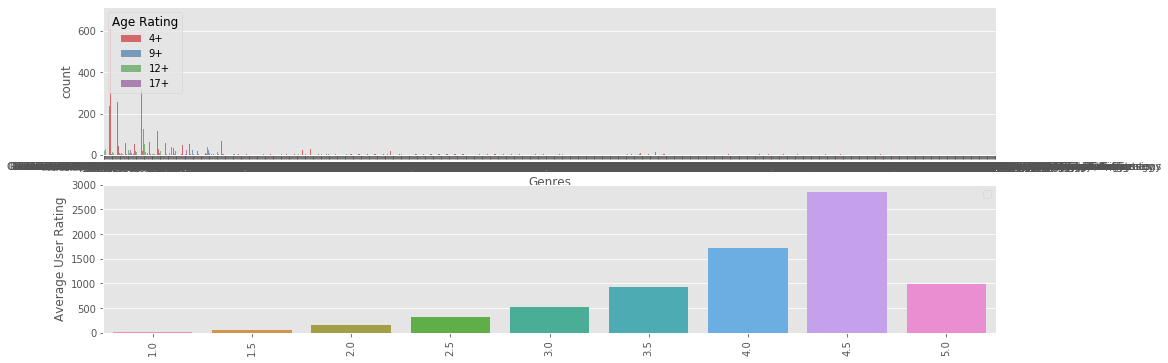

In [28]:
fig, ax = plt.subplots(2,1,figsize=(16, 6))
# type 1 : use hue parameter
sns.countplot(x='Genres', data=data, hue='Age Rating', palette='Set1', alpha=0.7, ax=ax[0])
plt.legend()
plt.xticks(rotation='vertical')

#type 2: use value_counts + barplot / hard to divide like hue 
sns.barplot(x=data['Average User Rating'].value_counts().index, y=data['Average User Rating'].value_counts(), ax=ax[1])
plt.show()